<a href="https://colab.research.google.com/github/ashwinibhatM19/Samsung/blob/main/LR_with_streamlit_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data Cleaning of Data Preprocessing

In [6]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


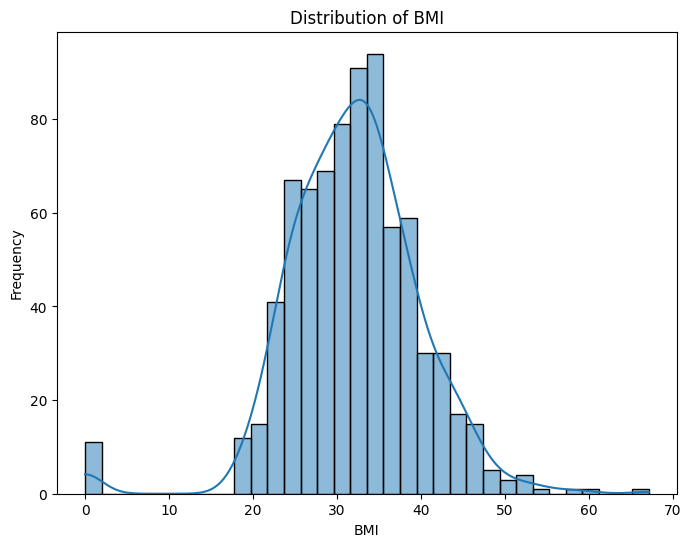

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a histogram for the 'BMI' column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BMI', kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

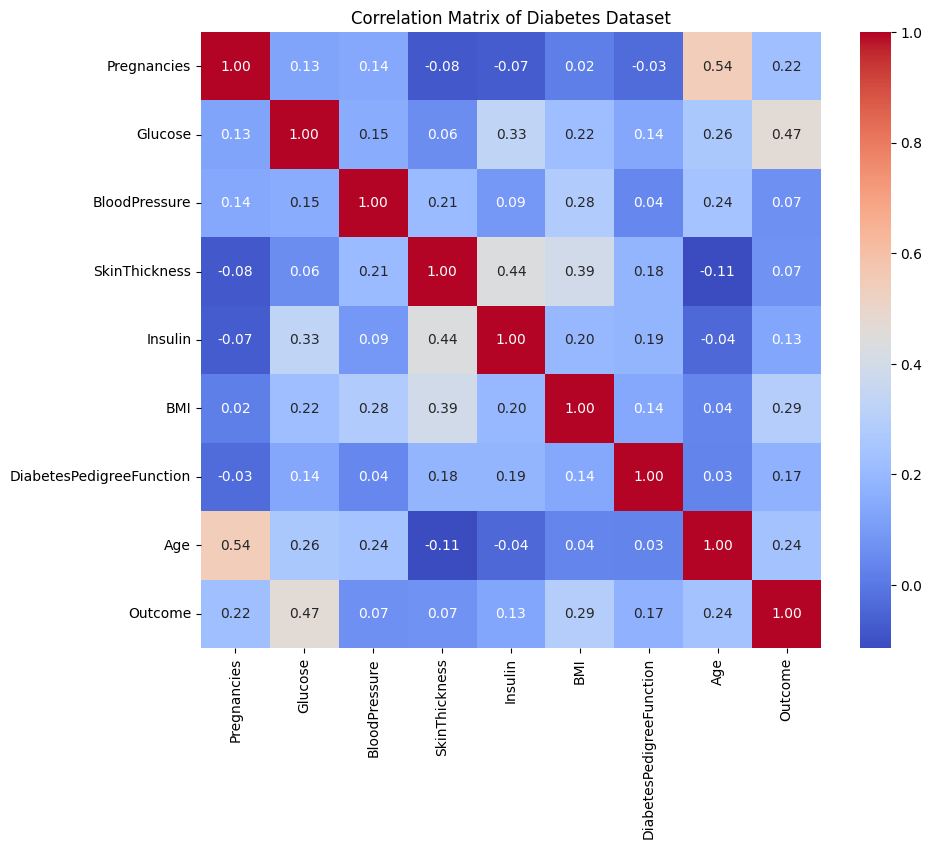

In [8]:
# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

/tmp/ipython-input-1632388967.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

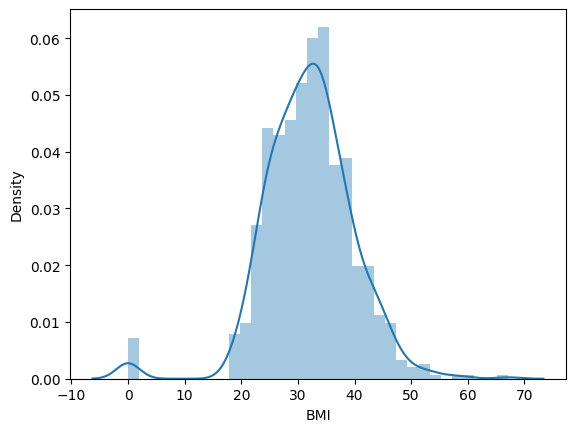

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['BMI'])

In [10]:
X=df['BloodPressure']
y=df['Outcome']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train.values.reshape(-1, 1), y_train)

LogisticRegression()

In [13]:
y_predict = model.predict(X_test.values.reshape(-1, 1))

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score

In [15]:
accuracy_score(y_test, y_predict)

0.672077922077922

In [16]:
confusion_matrix(y_test, y_predict)

array([[206,   0],
       [101,   1]])

Data transformation

In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       206
           1       1.00      0.01      0.02       102

    accuracy                           0.67       308
   macro avg       0.84      0.50      0.41       308
weighted avg       0.78      0.67      0.54       308



In [18]:
f1_score(y_test, y_predict)

0.019417475728155338

In [19]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

st.title("Diabetes Data Analysis and Logistic Regression Model")

# Sidebar for file upload
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Upload the Diabetes Data CSV file", type="csv")

if uploaded_file is not None:
    # Load data
    df= pd.read_csv(uploaded_file)

    # Create tabs for each exercise
    tab1, tab2, tab3, tab4, tab5, tab6 = st.tabs(["Data Overview", "Data Cleaning", "EDA", "Data Transformation", "Model Training", "Model Evaluation"])

    with tab1:
        st.header("Data Overview")
        st.write("### First 3 Rows")
        st.write(df.head(3))
        st.write("### Data Information")
        st.write(df.info())

    with tab2:
        st.header("Data Cleaning")

        # Check for missing values
        st.write("### Missing Values")
        st.write(df.isna().sum())

        # Check for duplicate rows
        st.write("### Duplicate Rows")
        st.write(df.duplicated().sum())

        # Drop duplicate rows
        df.drop_duplicates(inplace=True)
    with tab4:
        st.header("Data Transformation")

        st.write("Mapping categorical values in column 'D'")
        df_mercedes['D'] = df['D'].map({'Mercedes': 1, 'Ford': 0, 'Maruti': 0})

        # Dropping unnecessary columns
        new_data = df.drop(['Unnamed: 0', 'B'], axis=1)
        st.write(new_data.head(3))

    with tab5:
        st.header("Model Training")

        # Separating features and target
        X = new_data.drop(['D'], axis=1)
        y = new_data['D']

        # Splitting the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        # Training the model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        st.write("Logistic Regression model trained successfully!")

    with tab6:
        st.header("Model Evaluation")

        # Model prediction
        y_predict = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_predict)
        f1 = f1_score(y_test, y_predict)
        confusion = confusion_matrix(y_test, y_predict)
        report = classification_report(y_test, y_predict)

        st.write(f"Accuracy Score: {accuracy:.2f}")
        st.write(f"F1 Score: {f1:.2f}")
        st.write("Confusion Matrix:")
        st.write(confusion)
        st.write("Classification Report:")
        st.text(report)

Writing app.py


In [20]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [21]:
! wget -q -O - ipv4.icanhazip.com

34.125.170.176


In [22]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦

⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.170.176:8501

⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://fifty-emus-sip.loca.lt
y
z
a
b
c
d
  Stopping...
^C
